In [ ]:
#These files contain metadata for all 45,000 movies listed in the Full MovieLens Dataset. The dataset consists of movies released on or before July 2017. Data points include cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies, countries, TMDB vote counts and vote averages.

#This dataset also has files containing 26 million ratings from 270,000 users for all 45,000 movies. Ratings are on a scale of 1-5 and have been obtained from the official GroupLens website.

In [1]:
import numpy as np
import pandas as pd
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("C:\Dataset\movies_metadata.csv")

C:\Users\e3027859\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [5]:
df.drop(df.index[19730],inplace=True)
df.drop(df.index[29502],inplace=True)
df.drop(df.index[35585],inplace=True)

In [6]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [7]:
df_numeric = df[['budget','popularity','revenue','runtime','vote_average','vote_count','title']]

In [8]:
df_numeric.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,title
0,30000000,21.9469,373554033.0,81.0,7.7,5415.0,Toy Story
1,65000000,17.0155,262797249.0,104.0,6.9,2413.0,Jumanji
2,0,11.7129,0.0,101.0,6.5,92.0,Grumpier Old Men
3,16000000,3.85949,81452156.0,127.0,6.1,34.0,Waiting to Exhale
4,0,8.38752,76578911.0,106.0,5.7,173.0,Father of the Bride Part II


In [9]:
df_numeric.isnull().sum()

budget            0
popularity        3
revenue           3
runtime         260
vote_average      3
vote_count        3
title             3
dtype: int64

In [10]:
df_numeric.dropna(inplace=True)

C:\Users\e3027859\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
df_numeric.isnull().sum()

budget          0
popularity      0
revenue         0
runtime         0
vote_average    0
vote_count      0
title           0
dtype: int64

In [12]:
df_numeric['vote_count'].describe()

count    45203.000000
mean       110.506515
std        492.638190
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

In [ ]:
#We see that a half of movies have been rated less than 10 times. For easier interpretability, let's take only the movies that have more than 30 votes, i.e. top 26% of the movies.

In [13]:
df_numeric['vote_count'].quantile(np.arange(.74,1,0.01))

0.74      32.00
0.75      34.00
0.76      37.00
0.77      40.00
0.78      43.00
0.79      46.00
0.80      51.00
0.81      55.00
0.82      61.00
0.83      67.00
0.84      74.00
0.85      83.00
0.86      92.00
0.87     104.74
0.88     119.00
0.89     139.00
0.90     161.00
0.91     193.00
0.92     230.00
0.93     283.00
0.94     349.00
0.95     435.90
0.96     581.00
0.97     827.94
0.98    1243.88
0.99    2196.84
Name: vote_count, dtype: float64

In [14]:
df_numeric = df_numeric[df_numeric['vote_count']>30]

In [15]:
df_numeric.shape
df_numeric

,budget,popularity,revenue,runtime,vote_average,vote_count,title
0,30000000,21.9469,373554033.0,81.0,7.7,5415.0,Toy Story
1,65000000,17.0155,262797249.0,104.0,6.9,2413.0,Jumanji
2,0,11.7129,0.0,101.0,6.5,92.0,Grumpier Old Men
3,16000000,3.85949,81452156.0,127.0,6.1,34.0,Waiting to Exhale
4,0,8.38752,76578911.0,106.0,5.7,173.0,Father of the Bride Part II
5,60000000,17.9249,187436818.0,170.0,7.7,1886.0,Heat
6,58000000,6.67728,0.0,127.0,6.2,141.0,Sabrina
7,0,2.56116,0.0,97.0,5.4,45.0,Tom and Huck
8,35000000,5.23158,64350171.0,106.0,5.5,174.0,Sudden Death
9,58000000,14.686,352194034.0,130.0,6.6,1194.0,GoldenEye


In [16]:
from sklearn import preprocessing
minmax_processed = preprocessing.MinMaxScaler().fit_transform(df_numeric.drop('title',axis=1))
minmax_processed

C:\Users\e3027859\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[7.89473684e-02, 4.00821475e-02, 1.33988060e-01, 9.23603193e-02,
        8.10526316e-01, 3.83366562e-01],
       [1.71052632e-01, 3.10747827e-02, 9.42613127e-02, 1.18586089e-01,
        7.26315789e-01, 1.69609798e-01],
       [0.00000000e+00, 2.13893454e-02, 0.00000000e+00, 1.15165336e-01,
        6.84210526e-01, 4.34349188e-03],
       ...,
       [0.00000000e+00, 1.03464408e-02, 0.00000000e+00, 9.46408210e-02,
        6.52631579e-01, 4.27228710e-04],
       [0.00000000e+00, 3.80270018e-02, 0.00000000e+00, 4.56100342e-03,
        8.73684211e-01, 8.18855027e-03],
       [0.00000000e+00, 8.01820124e-03, 0.00000000e+00, 1.15165336e-01,
        5.47368421e-01, 8.11734549e-03]])

In [17]:
df_numeric_scaled = pd.DataFrame(minmax_processed, index=df_numeric.index, columns=df_numeric.columns[:-1])
df_numeric_scaled.head(3)

,budget,popularity,revenue,runtime,vote_average,vote_count
0,0.078947,0.040082,0.133988,0.092360,0.810526,0.383367
1,0.171053,0.031075,0.094261,0.118586,0.726316,0.169610
2,0.000000,0.021389,0.000000,0.115165,0.684211,0.004343


In [18]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]

In [19]:
score = [kmeans[i].fit(df_numeric_scaled).score(df_numeric_scaled) for i in range(len(kmeans))]

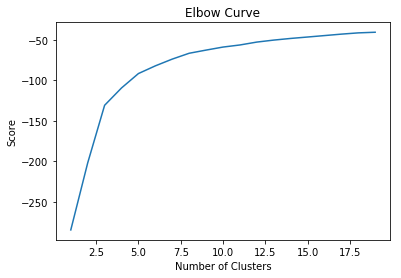

In [35]:
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [21]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_numeric_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [22]:
kmeans.labels_

array([1, 2, 0, ..., 0, 3, 4])

In [23]:
df_numeric.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,title
0,30000000,21.9469,373554033.0,81.0,7.7,5415.0,Toy Story
1,65000000,17.0155,262797249.0,104.0,6.9,2413.0,Jumanji
2,0,11.7129,0.0,101.0,6.5,92.0,Grumpier Old Men
3,16000000,3.85949,81452156.0,127.0,6.1,34.0,Waiting to Exhale
4,0,8.38752,76578911.0,106.0,5.7,173.0,Father of the Bride Part II


In [24]:
df_numeric['cluster'] = kmeans.labels_

In [25]:
df_numeric.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,title,cluster
0,30000000,21.9469,373554033.0,81.0,7.7,5415.0,Toy Story,1
1,65000000,17.0155,262797249.0,104.0,6.9,2413.0,Jumanji,2
2,0,11.7129,0.0,101.0,6.5,92.0,Grumpier Old Men,0
3,16000000,3.85949,81452156.0,127.0,6.1,34.0,Waiting to Exhale,0
4,0,8.38752,76578911.0,106.0,5.7,173.0,Father of the Bride Part II,0


In [ ]:
#Let's see cluster sizes first.

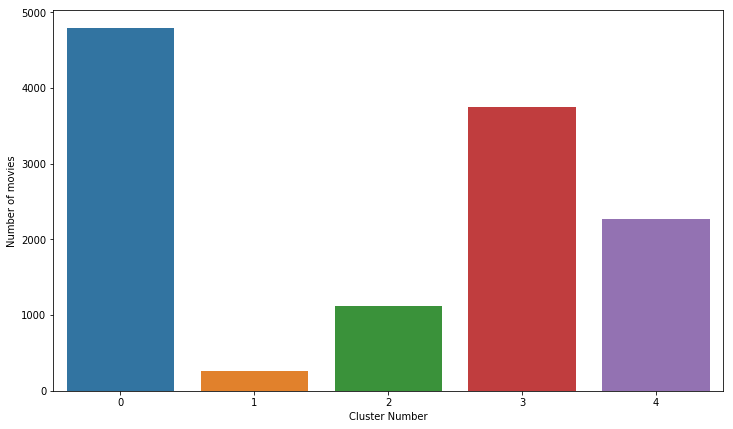

In [26]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,5,1),y=df_numeric.groupby(['cluster']).count()['budget'].values)
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("Number of movies")

In [28]:
df_numeric.groupby(['cluster']).mean()

,revenue,runtime,vote_average,vote_count
cluster,,,,
0,1.444018e+07,100.396364,6.188905,169.587338
1,6.288649e+08,126.146154,6.903846,4738.096154
2,1.616413e+08,114.293226,6.210784,1129.967023
3,1.687969e+07,109.901950,7.278520,304.510286
4,1.028055e+07,93.718130,4.940979,122.632554


In [30]:
size_array = list(df_numeric.groupby(['cluster']).count()['budget'].values)

In [31]:
size_array

[4786, 260, 1122, 3743, 2267]

In [ ]:
#We see that one cluster which is also the smallest, is the cluster of movies that received maximum number of votes(in terms of counts) and also have very high popularity and total runtime and net revenue. Let's see some of the movies that belong to this cluster.

In [33]:
df_numeric[df_numeric['cluster']==size_array.index(sorted(size_array)[0])].sample(5)

,budget,popularity,revenue,runtime,vote_average,vote_count,title,cluster
1167,32350000,14.5861,5.727000e+08,135.0,7.9,4763.0,Return of the Jedi,1
18289,145000000,14.2584,6.947134e+08,133.0,6.8,4026.0,Mission: Impossible - Ghost Protocol,1
256,11000000,42.1497,7.753980e+08,121.0,8.1,6778.0,Star Wars,1
18252,250000000,20.5826,1.084939e+09,165.0,7.6,9263.0,The Dark Knight Rises,1
18972,225000000,10.6844,6.240268e+08,106.0,6.3,4228.0,Men in Black 3,1


In [ ]:
#We see many big movie names in this cluster. So the results are intuitive.
#Cluster that is the second smallest cluster in the results, has 2nd highest votes count and the most highly rated movies. The runtime for these movies is on the higher end and popularity score is also good. Let's see some of the movie names from this cluster.

In [36]:
df_numeric[df_numeric['cluster']==size_array.index(sorted(size_array)[1])].sample(5)

,budget,popularity,revenue,runtime,vote_average,vote_count,title,cluster
19432,50000000,12.1524,41037742.0,95.0,6.6,1971.0,Dredd,2
10099,88000000,6.36388,108539911.0,144.0,7.3,630.0,Cinderella Man,2
12065,51500000,9.89791,55112356.0,100.0,7.2,867.0,Eastern Promises,2
14236,23600000,11.063,102391382.0,88.0,7.2,3655.0,Zombieland,2
15581,100000000,12.5366,170432927.0,107.0,6.1,1406.0,The Other Guys,2
